# Cluster products on TimeSeries variables

In [1]:
#Run in env Python3716 or HandelA2024B

import os
os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt


## Read data

In [2]:
# --- STEP 1: Load time series features ---
data = pd.read_excel('T1_TimeSeries_variables.xlsx', index_col=0)  
data['BoxCox'] = data['BoxCox'].fillna(data['BoxCox'].mean())

print(data)

           BoxCox     ADF p  Decomposed_regression
Product                                           
1051     0.571231  0.308784              -6.564040
1052     0.732822  0.110572           -1477.477808
1040     0.076982  0.062842           -5712.012156
1010     0.093423  0.076948          -13885.338750
1020    -0.012723  0.005244          -23594.366141
1013    -0.418742  0.373996          -49996.668569
1012     0.420235  0.391690          -77092.380616


## Find optimal number of clusters

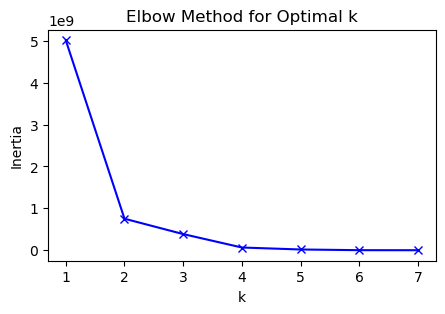

In [3]:
# Experimentera med olika antal kluster
inertias = []
k_range = range(1, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    #kmeans.fit(time_series_data_scaled)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## Make clusters

In [4]:
# --- STEP 2: Scale and cluster ---

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Clustering using k-Means
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(data_scaled)



## Save result to file

In [5]:
# --- STEP 3: Add cluster label back to Product_SubGroup ---
cluster_df = data.copy()
cluster_df['Cluster'] = labels
cluster_df = cluster_df.reset_index()  # Reset index to have 'Product_SubGroup' as column

# Save cluster file
cluster_df[['Product', 'Cluster']].to_excel('T2_clustered_products.xlsx', index=False)
print("✅ Clustered data saved.")

✅ Clustered data saved.
